# Libraries and data

In [1]:
%cd D://Flood Risk Churn-MF/Evaluacion del dataset 25001 para validacion de articulo/25001

D:\Flood Risk Churn-MF\Evaluacion del dataset 25001 para validacion de articulo\25001


C:\Users\ZM\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
#libraries
import pandas as pd
import numpy as np

In [4]:
#get the data
data = pd.read_csv("25001_61_71.csv",
                   index_col="FECHA",
                   parse_dates=True)
data.head(5)

,PRECIP,EVAP,TMAX,TMIN,FECHA_AUX
FECHA,,,,,
01/01/1961,1.0,5.0,25.0,13.0,01/01/1961
02/01/1961,1.0,5.0,27.5,14.0,02/01/1961
03/01/1961,1.0,5.0,31.0,11.0,03/01/1961
04/01/1961,1.0,5.0,32.0,13.0,04/01/1961
05/01/1961,1.0,5.0,29.0,14.0,05/01/1961


In [5]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head(2)    

,PRECIP,EVAP,TMAX,TMIN,FECHA_AUX
FECHA,,,,,
1961-01-01,1.0,5.0,25.0,13.0,01/01/1961
1961-01-02,1.0,5.0,27.5,14.0,02/01/1961


#Preparation

In [6]:
data = data.asfreq("MS")
data.index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01',
               ...
               '1971-03-01', '1971-04-01', '1971-05-01', '1971-06-01',
               '1971-07-01', '1971-08-01', '1971-09-01', '1971-10-01',
               '1971-11-01', '1971-12-01'],
              dtype='datetime64[ns]', name='FECHA', length=132, freq='MS')

In [31]:
# plotting the original data
print(data.shape)

(180, 5)


<Axes: title={'center': 'Precipítation (mm)'}, xlabel='FECHA'>

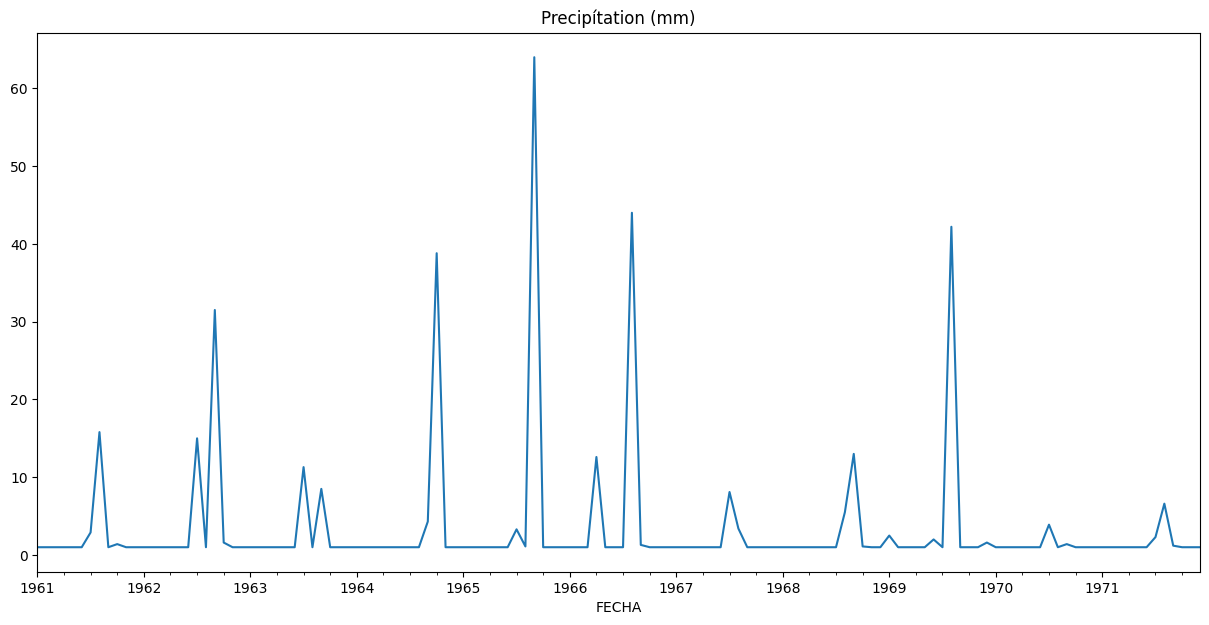

In [10]:
#Viz
data['PRECIP'].plot(title='Precipítation (mm)',figsize = (15,7))

In [ ]:
decompose_result = seasonal_decompose(data['PRECIP'],model='multiplicative')
decompose_result.plot();

In [8]:
#training and test set
test_months = 36
training_set = data.iloc[:-test_months,:]
test_set = data.iloc[-test_months:,:]
test_set.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA_AUX
FECHA,,,,,
1969-01-01,2.5,0.2,34.0,16.0,01/01/1969
1969-02-01,1.0,3.1,33.0,14.0,01/02/1969
1969-03-01,1.0,5.5,35.0,15.5,01/03/1969
1969-04-01,1.0,7.6,40.0,12.5,01/04/1969
1969-05-01,1.0,7.5,33.5,21.5,01/05/1969


In [27]:
data.head(5)

,PRECIP,EVAP,TMAX,TMIN,FECHA_AUX
FECHA,,,,,
1961-01-01,0.0,5.0,25.0,13.0,01/01/1961
1961-02-01,0.0,5.0,30.0,12.0,01/02/1961
1961-03-01,0.0,5.0,37.5,9.0,01/03/1961
1961-04-01,0.0,6.6,32.0,11.5,01/04/1961
1961-05-01,0.0,8.0,37.5,15.0,01/05/1961


#Holt Winters


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(training_set['PRECIP'],
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [19]:
#predictions 
predictions = model.forecast(steps = 36).rename("HW")
predictions

1969-01-01    0.661563
1969-02-01    0.665109
1969-03-01    0.676251
1969-04-01    2.079623
1969-05-01    0.613704
1969-06-01    0.647833
1969-07-01    2.384784
1969-08-01    4.772180
1969-09-01    7.672507
1969-10-01    2.222863
1969-11-01    0.611690
1969-12-01    0.605170
1970-01-01    0.602075
1970-02-01    0.605302
1970-03-01    0.615442
1970-04-01    1.892621
1970-05-01    0.558519
1970-06-01    0.589579
1970-07-01    2.170343
1970-08-01    4.343061
1970-09-01    6.982589
1970-10-01    2.022982
1970-11-01    0.556686
1970-12-01    0.550753
1971-01-01    0.547936
1971-02-01    0.550873
1971-03-01    0.560101
1971-04-01    1.722435
1971-05-01    0.508297
1971-06-01    0.536564
1971-07-01    1.975184
1971-08-01    3.952530
1971-09-01    6.354709
1971-10-01    1.841074
1971-11-01    0.506628
1971-12-01    0.501229
Freq: MS, Name: HW, dtype: float64

<Axes: xlabel='FECHA'>

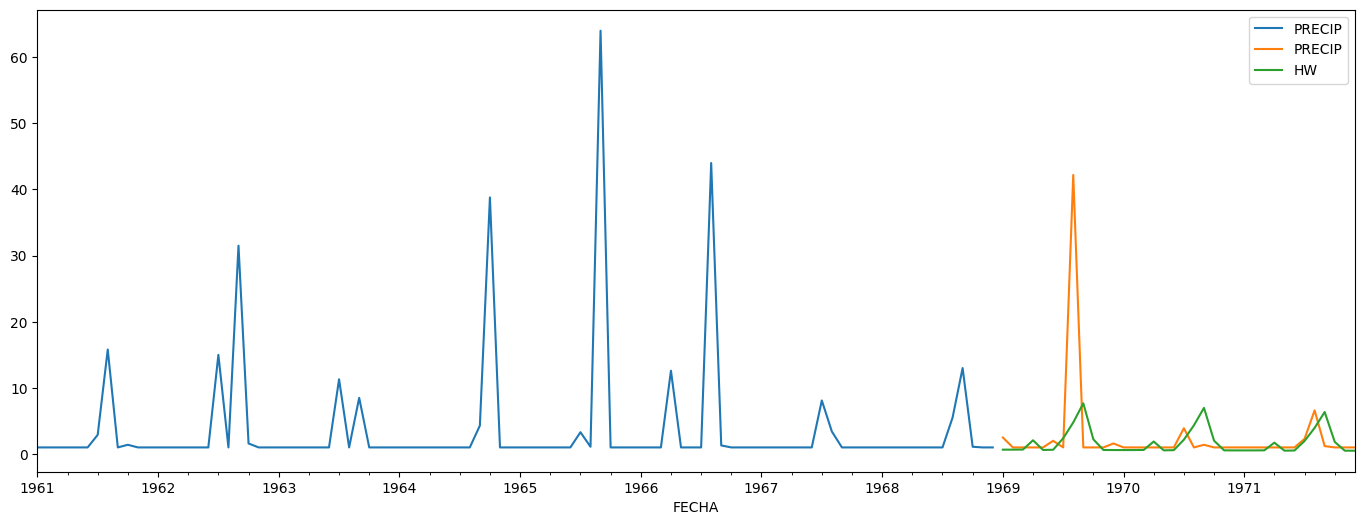

In [20]:
#plotting
training_set['PRECIP'].plot(figsize = (17,6), legend = True)
test_set['PRECIP'].plot(legend = True)
predictions.plot(legend = True)

In [21]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_set['PRECIP'], predictions)

2.2743809038689426